<a href="https://colab.research.google.com/github/Eason0227/Using-YOLO-v8-for-mask-detection/blob/main/YOLOv8_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using YOLO v8 for mask detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For preparing
import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''
annotation_directory contains files, and each file is associated to only one image,
and it contains the height and width of the image and also xmin,ymin,xmax, and ymax of each boundary box
inside the image
'''

# Tagged data in XML format
with open('/content/drive/MyDrive/Colab Notebooks/mask detection/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

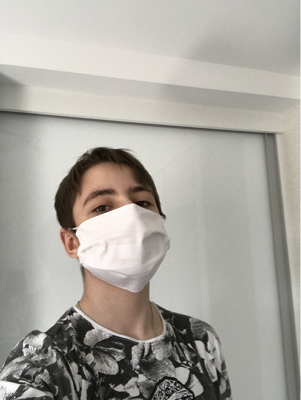

In [3]:
# A visual from inside the data set
Image.open("/content/drive/MyDrive/Colab Notebooks/mask detection/images/maksssksksss17.png")

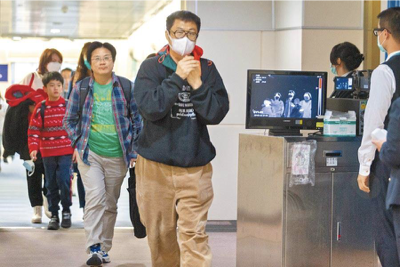

In [4]:
# A visual from inside the data set
Image.open("/content/drive/MyDrive/Colab Notebooks/mask detection/images/maksssksksss179.png")

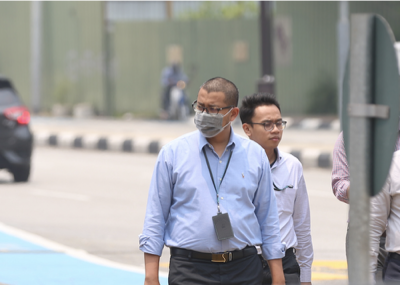

In [5]:
# A visual from inside the data set
Image.open("/content/drive/MyDrive/Colab Notebooks/mask detection/images/maksssksksss38.png")

### Prepare Data

In [6]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

classes = ["without_mask", "with_mask", "mask_weared_incorrect"]

input_dir = "/content/drive/MyDrive/Colab Notebooks/mask detection/annotations"
output_dir = "/content/drive/MyDrive/Colab Notebooks/mask detection/labels"
image_dir = "/content/drive/MyDrive/Colab Notebooks/mask detection/images"


if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

import glob
files = glob.glob(os.path.join(input_dir, "*.xml"))

for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()

    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall("object"):
        label = obj.find("name").text

        if label not in classes:
          classes.append(label)
        index = classes.index(label) # 0:without mask 1:with mask 2:incorrect wear mask

        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string = " ".join([str(x) for x in yolo_bbox]) #
        result.append(f"{index} {bbox_string}")

    if result:
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))

with open("/content/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

maksssksksss107 (1) image does not exist!
maksssksksss641 (1) image does not exist!
maksssksksss36 (1) image does not exist!
maksssksksss417 (1) image does not exist!
maksssksksss95 (1) image does not exist!
maksssksksss364 (1) image does not exist!
maksssksksss17 (1) image does not exist!
maksssksksss494 (1) image does not exist!
maksssksksss311 (1) image does not exist!
maksssksksss370 (1) image does not exist!
maksssksksss477 (1) image does not exist!
maksssksksss462 (1) image does not exist!
maksssksksss42 (1) image does not exist!
maksssksksss37 (1) image does not exist!
maksssksksss457 (1) image does not exist!
maksssksksss56 (1) image does not exist!
maksssksksss23 (1) image does not exist!
maksssksksss416 (1) image does not exist!
maksssksksss655 (1) image does not exist!
maksssksksss661 (1) image does not exist!
maksssksksss304 (1) image does not exist!
maksssksksss463 (1) image does not exist!
maksssksksss81 (1) image does not exist!
maksssksksss338 (1) image does not exist!


In [7]:
filename = os.path.splitext(basename)[0]
import re
filename = re.sub(r" \(\d+\)$", "", os.path.splitext(basename)[0])

In [8]:
with open('/content/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "with_mask", "mask_weared_incorrect"]


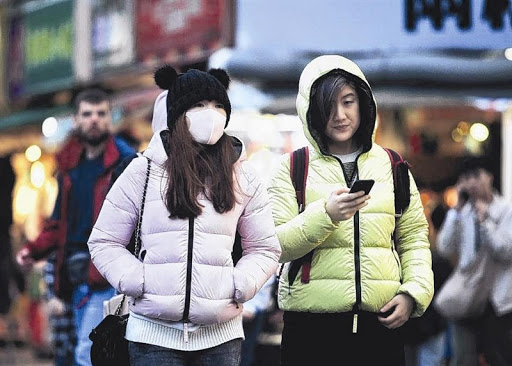

In [9]:
Image.open("/content/drive/MyDrive/Colab Notebooks/mask detection/images/maksssksksss0.png")

In [10]:
with open('/content/drive/MyDrive/Colab Notebooks/mask detection/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

In [11]:
with open('/content/drive/MyDrive/Colab Notebooks/mask detection/labels/maksssksksss0.txt') as f:
    contents = f.read()
    print(contents)

0 0.18359375 0.337431693989071 0.05859375 0.10109289617486339
1 0.4013671875 0.3333333333333333 0.080078125 0.12021857923497267
0 0.6689453125 0.3155737704918033 0.068359375 0.13934426229508196


### Create Data For YoloV8

In [12]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/mask detection/data"

if os.path.isdir(data_dir):
    print("The folder already exists!")
else:
    os.mkdir(data_dir)
    os.mkdir(f"{data_dir}/train")
    os.mkdir(f"{data_dir}/val")
    os.mkdir(f"{data_dir}/test")
    os.mkdir(f"{data_dir}/train/images")
    os.mkdir(f"{data_dir}/train/labels")
    os.mkdir(f"{data_dir}/test/images")
    os.mkdir(f"{data_dir}/test/labels")
    os.mkdir(f"{data_dir}/val/images")
    os.mkdir(f"{data_dir}/val/labels")
    print("All YOLO folders created successfully!")


The folder already exists!


In [13]:
metarial = []

for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/mask detection/images"):
    srt = i[:-4]
    metarial.append(srt)
metarial[0:10]

['maksssksksss1',
 'maksssksksss0',
 'maksssksksss115',
 'maksssksksss129',
 'maksssksksss138',
 'maksssksksss126',
 'maksssksksss102',
 'maksssksksss135',
 'maksssksksss12',
 'maksssksksss114']

In [14]:
import re
import os
import shutil

# Generate list of base filenames from the txt files in the labels directory
label_dir = "/content/drive/MyDrive/Colab Notebooks/mask detection/labels"
all_files = os.listdir(label_dir)

# Remove file extension and clean names like "file (1).txt" -> "file"
metarial = [re.sub(r" \(\d+\)$", "", os.path.splitext(f)[0]) for f in all_files if f.endswith(".txt")]

# Remove duplicates caused by removing (1)
metarial = list(set(metarial))

# Shuffle to randomize
import random
random.shuffle(metarial)

# Then pass the cleaned list to your function
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        file = metarial[i]
        try:
            shutil.copy(f"{main_txt_file}/{file}.txt", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/train/labels/{file}.txt")
            shutil.copy(f"{main_img_file}/{file}.png", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/train/images/{file}.png")
        except FileNotFoundError:
            print(f"Missing file for training: {file}")
            continue

    for i in range(train_size, train_size + test_size):
        file = metarial[i]
        try:
            shutil.copy(f"{main_txt_file}/{file}.txt", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/test/labels/{file}.txt")
            shutil.copy(f"{main_img_file}/{file}.png", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/{file}.png")
        except FileNotFoundError:
            print(f"Missing file for testing: {file}")
            continue

    for i in range(train_size + test_size, train_size + test_size + val_size):
        file = metarial[i]
        try:
            shutil.copy(f"{main_txt_file}/{file}.txt", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/val/labels/{file}.txt")
            shutil.copy(f"{main_img_file}/{file}.png", f"/content/drive/MyDrive/Colab Notebooks/mask detection/data/val/images/{file}.png")
        except FileNotFoundError:
            print(f"Missing file for validation: {file}")
            continue

# Call the function with cleaned data
preparinbdata(label_dir, "/content/drive/MyDrive/Colab Notebooks/mask detection/images", 603, 150, 100)


In [28]:
preparinbdata("/content/drive/MyDrive/Colab Notebooks/mask detection/labels", "/content/drive/MyDrive/Colab Notebooks/mask detection/images", 603, 150, 100)

In [29]:
%cd /content/drive/MyDrive/Colab Notebooks/mask detection/data

yaml_text = """train: /content/drive/MyDrive/Colab Notebooks/mask detection/data/train/images
val: /content/drive/MyDrive/Colab Notebooks/mask detection/data/val/images
nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

with open("/content/drive/MyDrive/Colab Notebooks/mask detection/data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat data/data.yaml

/content/drive/MyDrive/Colab Notebooks/mask detection/data
cat: data/data.yaml: No such file or directory


### YoloV8

In [30]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


### Training

In [31]:
# if os.path.isfile("/content/drive/MyDrive/Colab Notebooks/mask detection/Result/"):
#     print("Dosya mevcut! (There is folder!)")
# else:
#     os.mkdir("/content/drive/MyDrive/Colab Notebooks/mask detection/Result/")

%cd /content/drive/MyDrive/Colab Notebooks/mask detection/Result/


!yolo train model=yolov8n.pt data = "/content/drive/MyDrive/Colab Notebooks/mask detection/data/data.yaml" epochs=50 imgsz=640

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/mask detection/Result/'
/content/drive/MyDrive/Colab Notebooks/mask detection/data
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/mask detection/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

In [17]:
# prompt: i need to calculate accuracy for the model and the path for my results.csv is /content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/train2/results.csv however there is no accuracy metric metrics/mAP50(B) is not the same as accuracy

import pandas as pd

results_path = "/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/train2/results.csv"

try:
    results_df = pd.read_csv(results_path)
    # Assuming 'metrics/mAP50' is the relevant metric in your results.csv
    # You might need to adjust the column name based on your actual data.
    map50 = results_df['metrics/mAP50-B'].iloc[-1]  # Get the last value of mAP50
    print(f"mAP50-B: {map50}")

except FileNotFoundError:
    print(f"Error: Results file not found at {results_path}")
except KeyError:
    print(f"Error: 'metrics/mAP50-B' column not found in the results file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


KeyError: 'metrics/accuracy'

### result


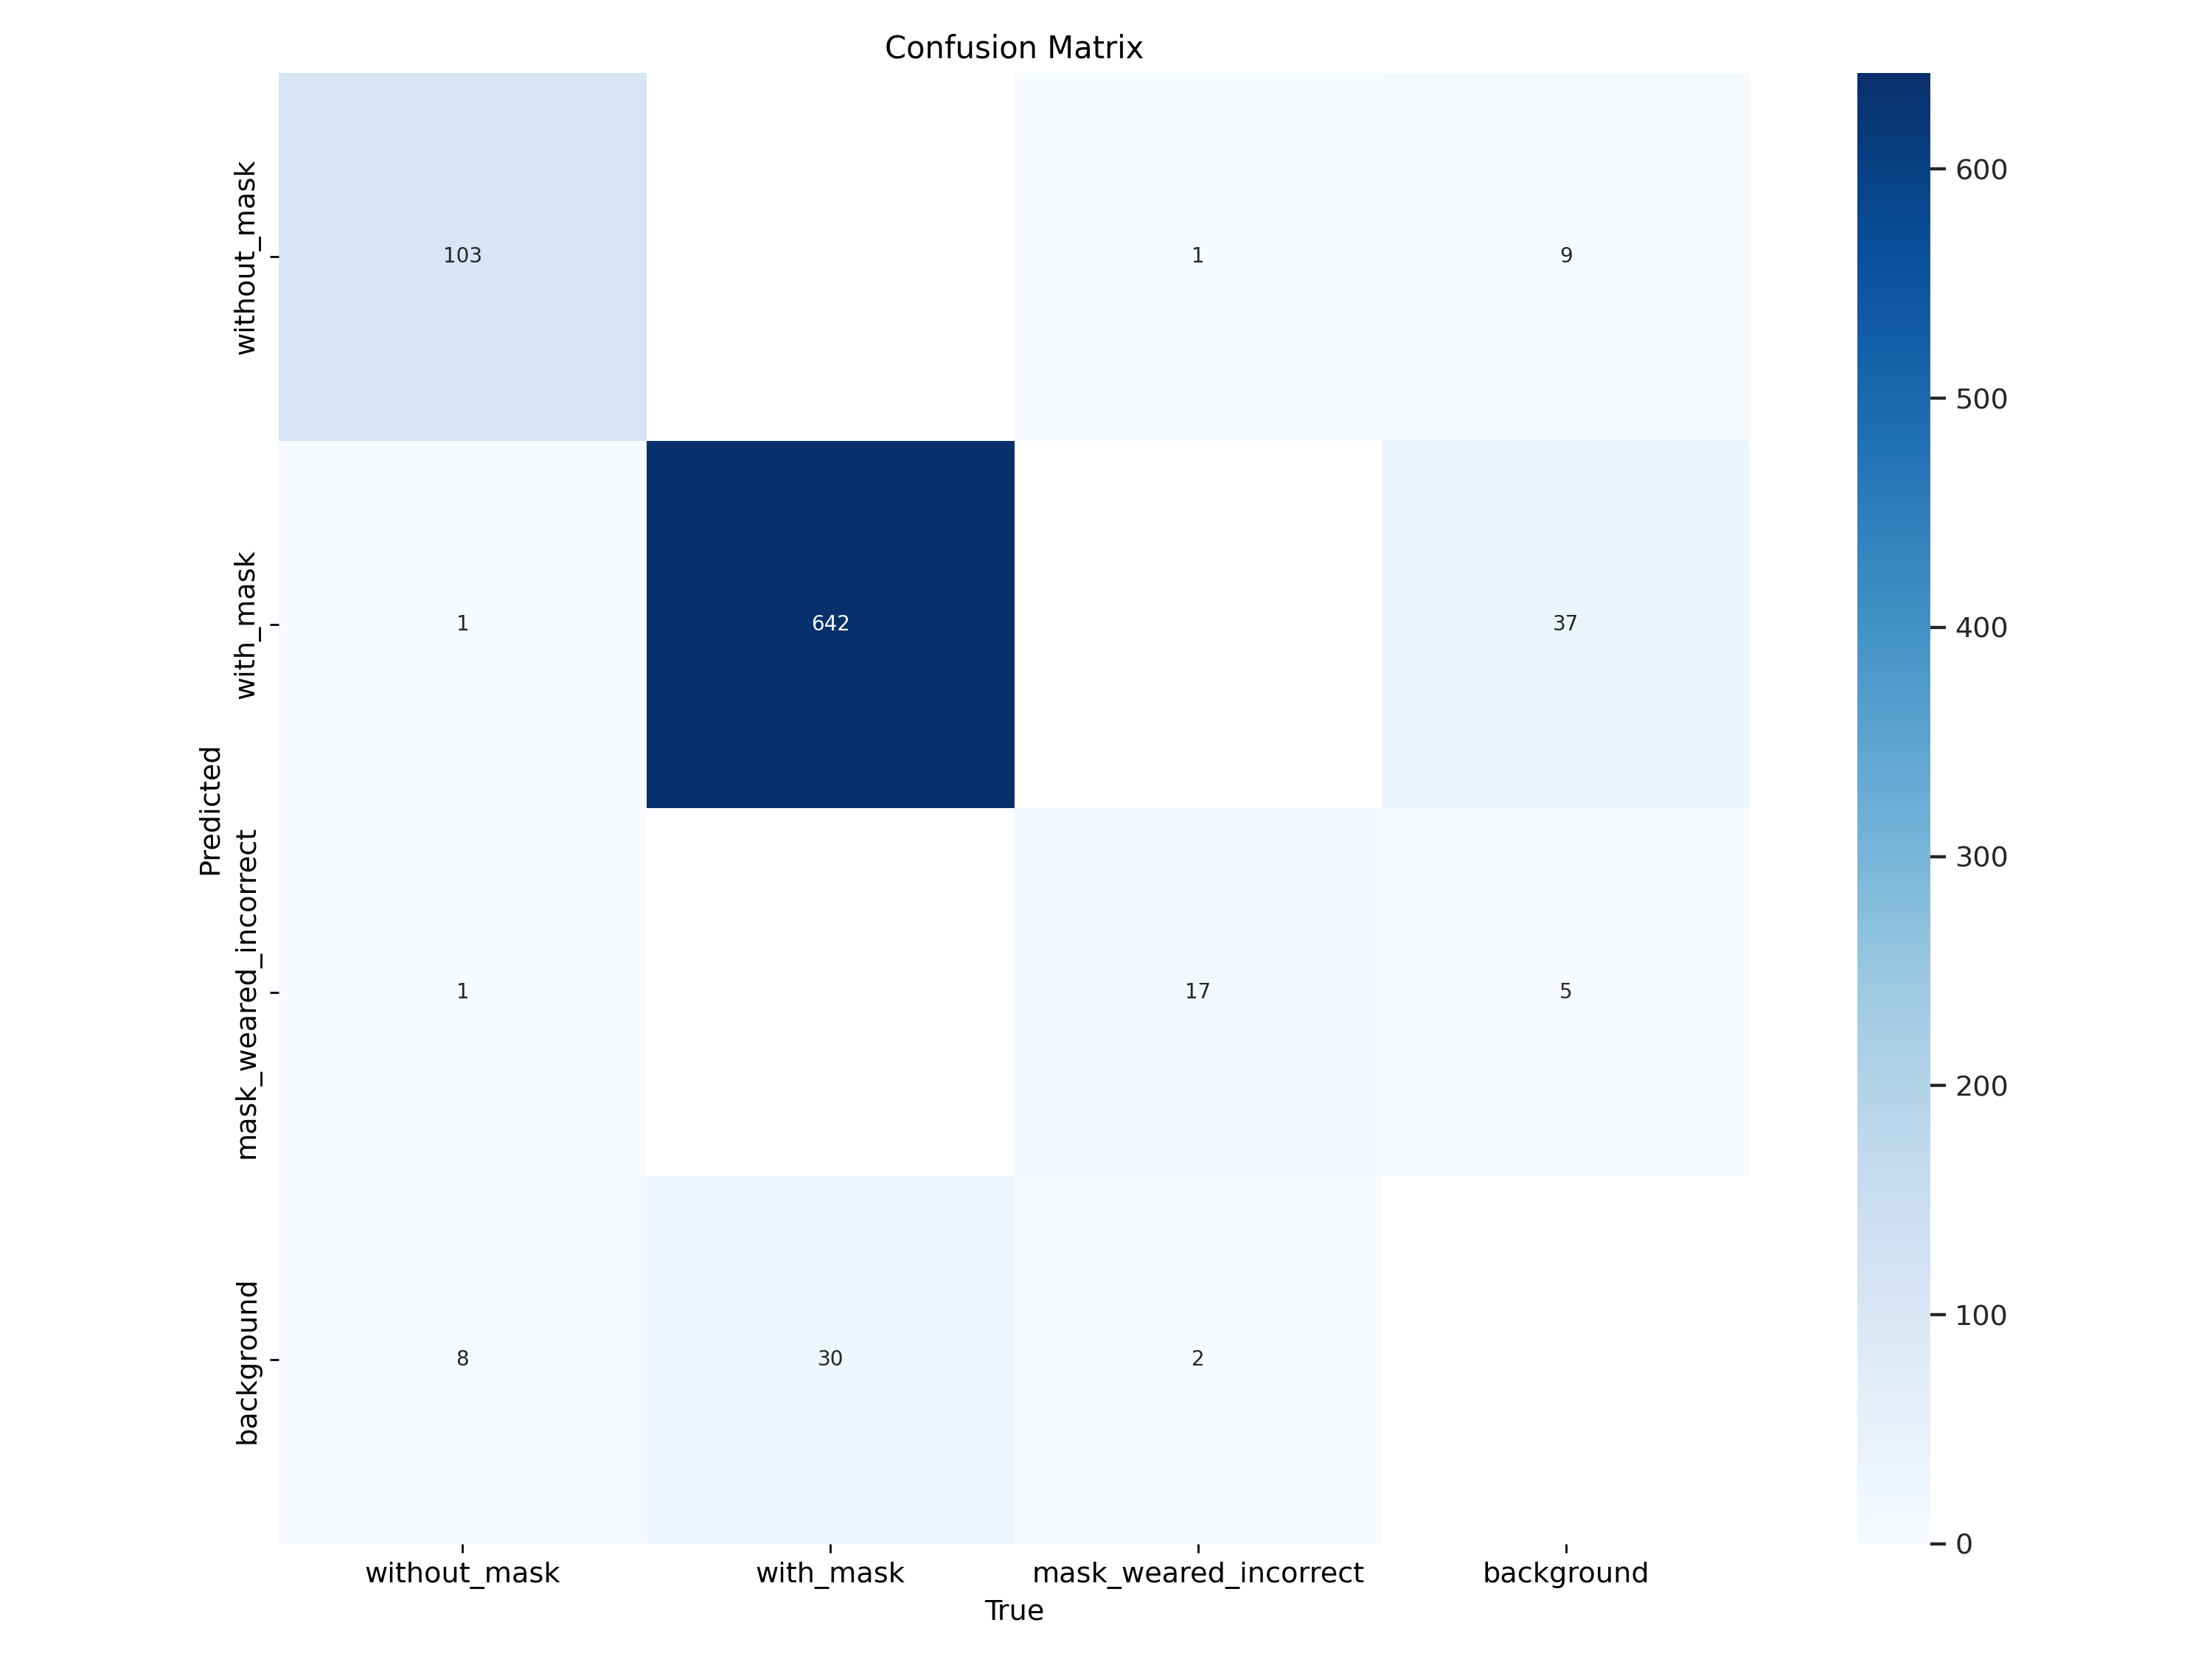

In [16]:
Image.open("/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/train2/confusion_matrix.png")

### Detection

In [34]:
!yolo predict model="/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/train2/weights/best.pt" source="/content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images"

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss0.png: 480x640 2 without_masks, 1 with_mask, 35.7ms
image 2/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss106.png: 448x640 1 with_mask, 33.4ms
image 3/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss107.png: 640x512 1 with_mask, 88.3ms
image 4/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss109.png: 640x640 1 with_mask, 8.2ms
image 5/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss110.png: 448x640 18 without_masks, 10 with_masks, 7.7ms
image 6/276 /content/drive/MyDrive/Colab Notebooks/mask detection/data/test/images/maksssksksss111.png: 448x640 2 without_masks, 9 with_masks, 

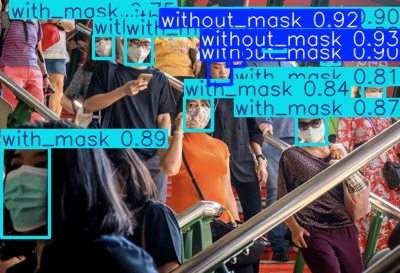

In [35]:
# Detection result - 1

Image.open( '/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/predict/maksssksksss451.jpg' )

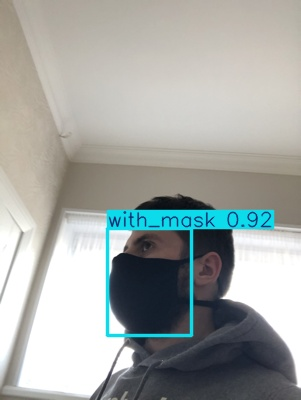

In [36]:
# Detection result - 2
Image.open('/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/predict/maksssksksss78.jpg')

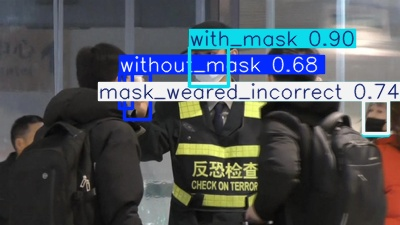

In [37]:
# Detection result(Tespit sonucu) - 3
Image.open('/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/predict/maksssksksss678.jpg')

In [5]:
!find /content/drive/MyDrive/ -name "amrutha.jpg"

/content/drive/MyDrive/Colab Notebooks/mask detection/amrutha.jpg


### Real-world data



In [38]:
%cd /content/drive/MyDrive/Colab Notebooks/mask detection/data
!yolo predict model="/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/train2/weights/best.pt" source='/content/drive/MyDrive/Colab Notebooks/mask detection/friends.jpg'

/content/drive/MyDrive/Colab Notebooks/mask detection/data
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/mask detection/friends.jpg: 320x640 1 without_mask, 3 with_masks, 37.4ms
Speed: 2.7ms preprocess, 37.4ms inference, 192.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


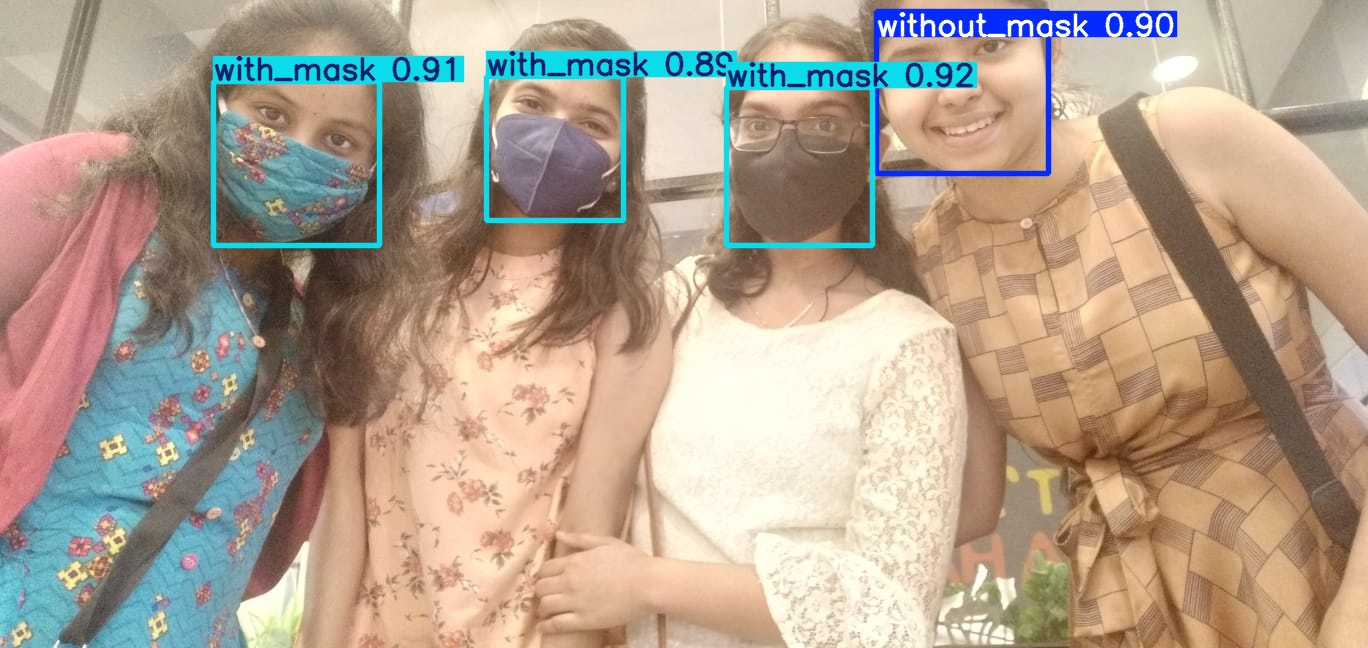

In [39]:
from PIL import Image
Image.open('/content/drive/MyDrive/Colab Notebooks/mask detection/data/runs/detect/predict5/friends.jpg')